In [ ]:
%tensorflow_version 2.x
from PIL import Image
from io import BytesIO

import requests
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

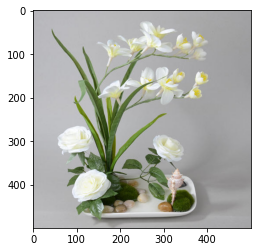

In [ ]:
# 读取图片
img_url="https://ss0.bdstatic.com/70cFvHSh_Q1YnxGkpoWK1HF6hhy/it/u=1626755843,442212037&fm=26&gp=0.jpg"
r=requests.get(img_url)
I=Image.open(BytesIO(r.content))
plt.imshow(I)

In [ ]:
data=np.asarray(I)

In [ ]:
data.shape

(500, 500, 3)

In [ ]:
img_gray = np.array(I.convert('L'),'f')

In [ ]:
img_gray.shape

(500, 500)

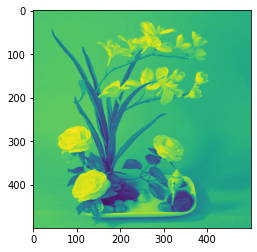

In [ ]:
plt.imshow(img_gray)

In [ ]:
img_test=img_gray.reshape(1,img_gray.shape[1],img_gray.shape[0],1)

In [ ]:
# filter=np.array([[-1,0,-1],[-1,0,1],[-1,0,1]],dtype=np.float32)
# filter=np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=np.float32)
# filter=np.array([[1,0,-1],[1,0,-1],[1,0,-1]],dtype=np.float32)
# filter=np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=np.float32)
# filter=np.array([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]],dtype=np.float32)
filter=np.full((3,3),-3,dtype=np.float32)
kernel=filter.reshape(*filter.shape,1,1)

img_in=tf.constant(img_test,dtype=np.float32)
kernel_in=tf.constant(kernel,dtype=np.float32)
img_out=tf.nn.conv2d(img_in,kernel_in,strides=[1,1,1,1],padding='VALID')

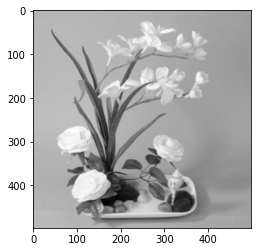

In [ ]:
plt.imshow(img_out[0,:,:,0],cmap='gray')